<a href="https://colab.research.google.com/github/GrabowMar/NNproject/blob/main/Projekt_Sieci_Neuronowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import kagglehub
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
from tqdm import tqdm
import random
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download -d nipunarora8/age-gender-and-ethnicity-face-data-csv -p /content/drive/MyDrive/kaggle

Dataset URL: https://www.kaggle.com/datasets/nipunarora8/age-gender-and-ethnicity-face-data-csv
License(s): copyright-authors
age-gender-and-ethnicity-face-data-csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

file_path = '/content/drive/MyDrive/kaggle/age-gender-and-ethnicity-face-data-csv.zip'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/kaggle/age_gender.csv')
print(data)

       age  ethnicity  gender                        img_name  \
0        1          2       0  20161219203650636.jpg.chip.jpg   
1        1          2       0  20161219222752047.jpg.chip.jpg   
2        1          2       0  20161219222832191.jpg.chip.jpg   
3        1          2       0  20161220144911423.jpg.chip.jpg   
4        1          2       0  20161220144914327.jpg.chip.jpg   
...    ...        ...     ...                             ...   
23700   99          0       1  20170120221920654.jpg.chip.jpg   
23701   99          1       1  20170120134639935.jpg.chip.jpg   
23702   99          2       1  20170110182418864.jpg.chip.jpg   
23703   99          2       1  20170117195405372.jpg.chip.jpg   
23704   99          0       1  20170110182052119.jpg.chip.jpg   

                                                  pixels  
0      129 128 128 126 127 130 133 135 139 142 145 14...  
1      164 74 111 168 169 171 175 182 184 188 193 199...  
2      67 70 71 70 69 67 70 79 90 103 116 

In [ ]:
data = data.drop(["img_name", "age", "gender"], axis=1)
print(data)

       ethnicity                                             pixels
0              2  129 128 128 126 127 130 133 135 139 142 145 14...
1              2  164 74 111 168 169 171 175 182 184 188 193 199...
2              2  67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3              2  193 197 198 200 199 200 202 203 204 205 208 21...
4              2  202 205 209 210 209 209 210 211 212 214 218 21...
...          ...                                                ...
23700          0  127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701          1  23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702          2  59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703          2  45 108 120 156 206 197 140 180 191 199 204 207...
23704          0  156 161 160 165 170 173 166 177 183 191 187 18...

[23705 rows x 2 columns]


In [ ]:
data.isnull().sum()

x = data[["pixels"]].copy()
y = data[["ethnicity"]].copy()
del data

In [ ]:
print(x.head(), "\n")
print(y.head())

                                              pixels
0  129 128 128 126 127 130 133 135 139 142 145 14...
1  164 74 111 168 169 171 175 182 184 188 193 199...
2  67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3  193 197 198 200 199 200 202 203 204 205 208 21...
4  202 205 209 210 209 209 210 211 212 214 218 21... 

   ethnicity
0          2
1          2
2          2
3          2
4          2


In [ ]:
num_pixels = len(x["pixels"][0].split(" "))
img_height, img_width = int(np.sqrt(num_pixels)), int(np.sqrt(num_pixels))
print(num_pixels, img_height, img_width)

2304 48 48


In [ ]:
x = pd.Series(x["pixels"]).apply(lambda x: x.split(' '))
x = x.apply(lambda x: np.array(list(map(lambda y: int(y), x))))
x = np.stack(np.array(x), axis=0).reshape(-1,48,48,1)
x = x/255

print("x shape: ", x.shape)

x shape:  (23705, 48, 48, 1)


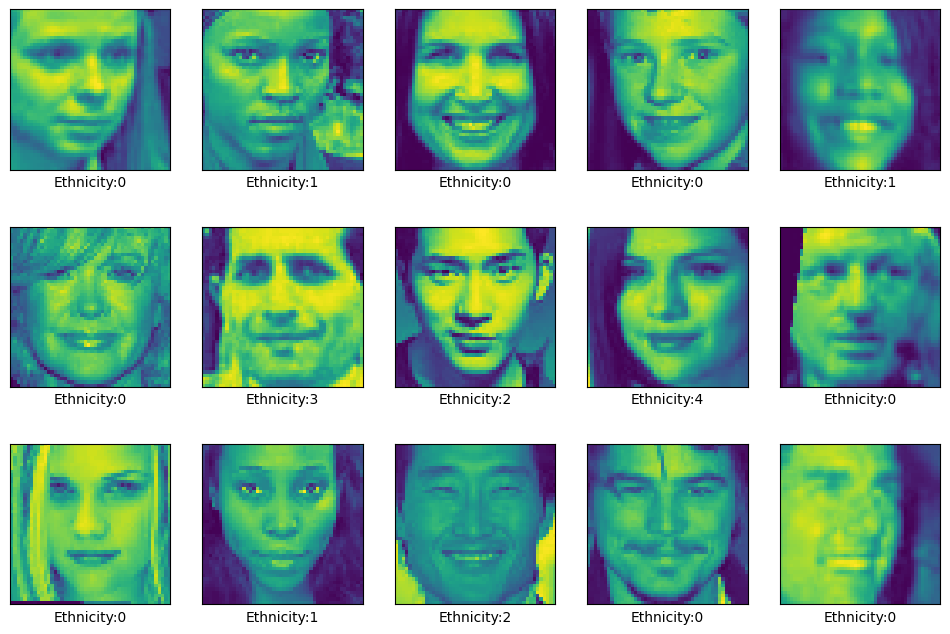

In [ ]:
plt.figure(figsize=(12,8))
for i, a in zip(np.random.randint(0, x.shape[0], 16), range(1,16)):
    plt.subplot(3,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i])
    plt.xlabel("Ethnicity:"+str(y['ethnicity'].iloc[i]))
plt.show()

In [ ]:
ethnicity_matrix = np.array(y["ethnicity"])
ethnicity_labels = to_categorical(ethnicity_matrix, num_classes = 5)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_temp, ethnicity_train, ethnicity_temp = train_test_split(
    x, ethnicity_labels, test_size=0.4, random_state=42
)

x_val, x_test, ethnicity_val, ethnicity_test = train_test_split(
    x_temp, ethnicity_temp, test_size=0.5, random_state=42
)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)

print("ethnicity_train shape:", ethnicity_train.shape)
print("ethnicity_val shape:", ethnicity_val.shape)
print("ethnicity_test shape:", ethnicity_test.shape)

x_train shape: (14223, 48, 48, 1)
x_val shape: (4741, 48, 48, 1)
x_test shape: (4741, 48, 48, 1)
ethnicity_train shape: (14223, 5)
ethnicity_val shape: (4741, 5)
ethnicity_test shape: (4741, 5)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.InputLayer(input_shape=(48, 48, 1)),
    layers.RandomZoom(0.05),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.075),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_zoom_4 (RandomZoom)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,142,021 (4.36 MB)

 Trainable params: 1,142,021 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 80

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

earlyStop = EarlyStopping(monitor='val_accuracy', mode='max', patience=3)

history = model.fit(x_train, ethnicity_train, epochs=15, validation_data = (x_val, ethnicity_val), callbacks=[earlyStop])

Epoch 1/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 62s 134ms/step - accuracy: 0.5144 - loss: 1.2646 - val_accuracy: 0.6642 - val_loss: 0.9168
Epoch 2/15
 39/445 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.6716 - loss: 0.8736

KeyboardInterrupt: 

149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7563 - loss: 1.0582
Test Loss: 1.0133042335510254, Test Accuracy: 0.7618646025657654


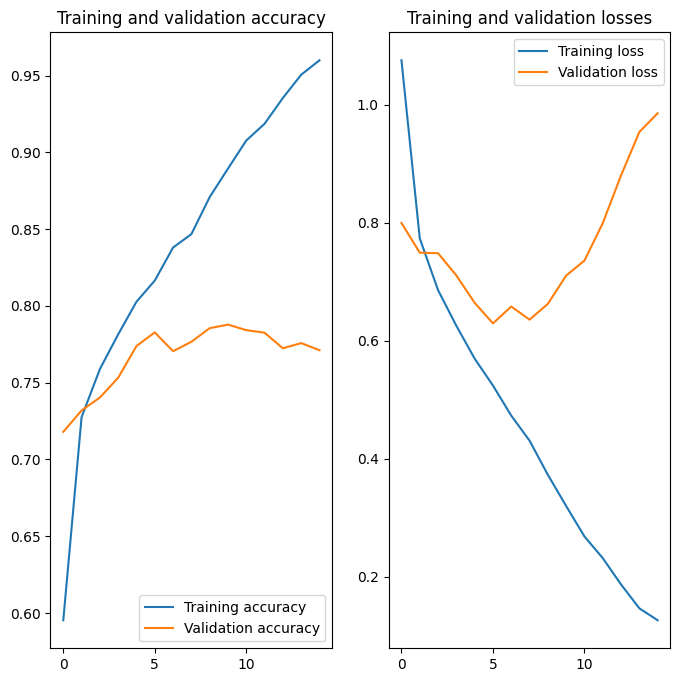

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, ethnicity_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

#accuracy na poziomie 0.43 - niezadawalające
history.history['accuracy']
history.history['val_accuracy']
Training_history_visualisation(history, 15)

149/149 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step


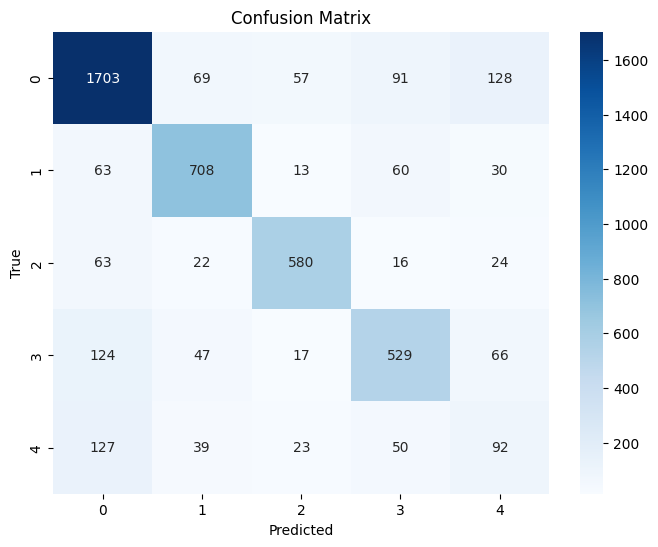

In [ ]:
ethnicity_pred = model.predict(x_test)
ethnicity_pred = np.argmax(ethnicity_pred, axis = 1)
ethnicity_test_labels = np.argmax(ethnicity_test, axis = 1)

class_names = ["0", "1", "2", "3", "4"]
plot_confusion_matrix_from_dataset(ethnicity_test_labels, ethnicity_pred, class_names)

In [ ]:
def Training_history_visualisation(history,epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8,8))
  plt.subplot(1,2,1)
  plt.plot(epochs_range, acc, label="Training accuracy")
  plt.plot(epochs_range, val_acc, label="Validation accuracy")
  plt.legend(loc='lower right')
  plt.title('Training and validation accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs_range, loss, label="Training loss")
  plt.plot(epochs_range, val_loss, label="Validation loss")
  plt.legend(loc="upper right")
  plt.title("Training and validation losses")
  plt.show()

def plot_confusion_matrix_from_dataset(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()